In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install xgboost

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

from sklearn.linear_model import Ridge, Lasso
R = Ridge()
L= Lasso()
from sklearn.linear_model import ElasticNet
E = ElasticNet(l1_ratio=.9)
from sklearn.tree import ExtraTreeRegressor
ETR = ExtraTreeRegressor()

from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
from sklearn.neighbors import KNeighborsRegressor
est = KNeighborsRegressor()

In [4]:
df=pd.read_csv('market.csv')

### EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [6]:
df['Influencer'].replace({'Mega':0, 'Micro':1, 'Macro':3, 'Nano':4}, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   int64  
 4   Sales         4566 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 178.7 KB


In [8]:
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,0,54.732757
1,13.0,9.237765,2.409567,0,46.677897
2,41.0,15.886446,2.913410,0,150.177829
3,83.0,30.020028,6.922304,0,298.246340
4,15.0,8.437408,1.405998,1,56.594181


In [9]:
df.sample(5)

,TV,Radio,Social Media,Influencer,Sales
585,64.0,27.024803,3.399218,3,226.754030
605,97.0,35.166875,5.677769,0,342.731527
803,46.0,12.563884,5.640950,3,169.403570
107,63.0,26.035986,3.290817,4,225.486232
2077,23.0,10.700570,0.582369,4,79.201472


In [10]:
df.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [11]:
df['Sales'].fillna(int(df['Sales'].mean()), inplace=True)

In [12]:
df['TV'].fillna(int(df['TV'].mean()), inplace=True)

In [13]:
df['Radio'].fillna(int(df['Radio'].mean()), inplace=True)

In [14]:
df['Social Media'].fillna(int(df['Social Media'].mean()), inplace=True)

In [15]:
df.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [16]:
abs(df.corr()['Sales']).sort_values(ascending=False)

Sales           1.000000
TV              0.996652
Radio           0.867369
Social Media    0.528094
Influencer      0.010992
Name: Sales, dtype: float64

In [17]:
df.describe()

,TV,Radio,Social Media,Influencer,Sales
count,4572.000000,4572.000000,4572.000000,4572.000000,4572.000000
mean,54.066710,18.160216,3.323531,1.984908,192.465990
std,26.096461,9.672725,2.211249,1.583521,93.071949
min,10.000000,0.000684,0.000031,0.000000,31.199409
25%,32.000000,10.546519,1.529879,0.000000,112.397660
50%,53.000000,17.875181,3.054085,1.000000,189.632530
75%,77.000000,25.647476,4.805832,3.000000,272.414914
max,100.000000,48.871161,13.981662,4.000000,364.079751


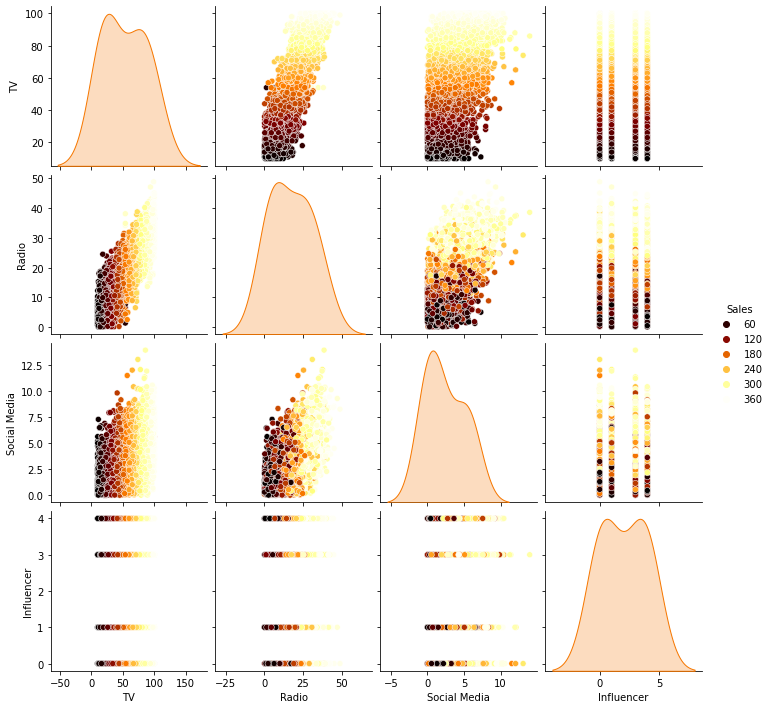

In [18]:
sns.pairplot(df, hue='Sales',palette='afmhot',size=2.5)

In [19]:
x = df[['TV','Radio','Social Media']]

In [20]:
y = df[['Sales']]

In [21]:
df.shape

(4572, 5)

In [22]:
x.shape

(4572, 3)

In [23]:
y.shape

(4572, 1)

In [24]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=13)

In [25]:
x_train.shape, x_test.shape,y_train.shape, y_test.shape 

((3657, 3), (915, 3), (3657, 1), (915, 1))

In [26]:
regmodel = lr.fit(x_train,y_train)

In [27]:
y_pretest = regmodel.predict(x_test)
y_pretest

array([[135.62996854],
       [ 81.63016115],
       [272.94416628],
       [209.16442848],
       [345.13943523],
       [327.49068546],
       [ 95.30956008],
       [277.28688462],
       [106.73488954],
       [ 63.76834311],
       [ 81.85486995],
       [234.4207731 ],
       [ 85.23538979],
       [195.61768809],
       [ 81.63745763],
       [153.3973974 ],
       [340.70801403],
       [104.24836567],
       [109.91614493],
       [216.85485611],
       [ 71.50565486],
       [237.69040971],
       [ 95.94550872],
       [356.03062581],
       [181.30820844],
       [ 70.82374783],
       [ 81.02060905],
       [217.29590869],
       [192.83158263],
       [299.46900307],
       [ 86.21052602],
       [317.97143842],
       [271.35199759],
       [334.01262868],
       [ 81.18735236],
       [ 64.59779753],
       [248.6587493 ],
       [ 99.41711253],
       [280.21832252],
       [100.09422565],
       [ 85.21612764],
       [ 49.68411437],
       [234.70137489],
       [223

In [28]:
y_pretest = regmodel.predict(x_test)
y_pretest

array([[135.62996854],
       [ 81.63016115],
       [272.94416628],
       [209.16442848],
       [345.13943523],
       [327.49068546],
       [ 95.30956008],
       [277.28688462],
       [106.73488954],
       [ 63.76834311],
       [ 81.85486995],
       [234.4207731 ],
       [ 85.23538979],
       [195.61768809],
       [ 81.63745763],
       [153.3973974 ],
       [340.70801403],
       [104.24836567],
       [109.91614493],
       [216.85485611],
       [ 71.50565486],
       [237.69040971],
       [ 95.94550872],
       [356.03062581],
       [181.30820844],
       [ 70.82374783],
       [ 81.02060905],
       [217.29590869],
       [192.83158263],
       [299.46900307],
       [ 86.21052602],
       [317.97143842],
       [271.35199759],
       [334.01262868],
       [ 81.18735236],
       [ 64.59779753],
       [248.6587493 ],
       [ 99.41711253],
       [280.21832252],
       [100.09422565],
       [ 85.21612764],
       [ 49.68411437],
       [234.70137489],
       [223

In [29]:
(mean_squared_error(y_test, y_pretest)) ** 0.5

6.547015064398573

In [30]:
r2_score( y_pretest,y_test)

0.9949110686060391

In [31]:
R.fit(x_train, y_train)
y_pred_ridge = R.predict(x_test)

In [32]:
(mean_squared_error(y_test, y_pred_ridge))**0.5

6.5470141256208745

In [33]:
r2_score(y_test, y_pred_ridge)

0.9949464092549056

In [34]:
L.fit(x_train, y_train)
y_pred_lasso = L.predict(x_test)

In [35]:
y_pred_lasso

array([135.51597558,  81.86933938, 273.24355813, 209.14369655,
       345.28131846, 327.43400736,  95.59156153, 277.42486356,
       106.89862254,  63.95132229,  81.99775296, 234.2964122 ,
        85.39737558, 195.71087256,  81.87324947, 153.46033569,
       341.06792116, 103.97807836, 110.04996091, 217.07877934,
        71.49077266, 237.95110547,  96.01897894, 355.91234363,
       181.12120217,  71.01922897,  81.31312979, 216.99722059,
       192.68573995, 299.05652442,  86.25274222, 318.56262029,
       270.85735419, 334.06264357,  81.43615851,  64.65686697,
       248.69652595,  99.56095145, 280.43030688,  99.79935893,
        85.24410612,  49.8313352 , 234.66327786, 223.48435749,
        88.82764281, 348.42275268,  92.70230809, 212.96018174,
       130.7575747 , 351.50054371,  74.8456811 ,  85.47973016,
       160.585116  , 291.55678661, 163.90931418, 296.15558008,
       163.61318121, 116.54692607, 174.38950771,  96.67764134,
       323.68208019,  46.20504946, 262.86862803,  46.17

In [36]:
(mean_squared_error(y_test, y_pred_lasso))**0.5

6.546116343206232

In [37]:
r2_score(y_test,  y_pred_lasso)

0.9949477951428041

In [38]:
E.fit(x_train,y_train)
y_pred_elastic = E.predict(x_test)

In [39]:
(mean_squared_error(y_test, y_pred_elastic))**0.5

6.545054274187853

In [40]:
r2_score(y_test, y_pred_elastic)

0.9949494343910814

In [41]:
ETR.fit(x_train,y_train)
y_pred_etr = ETR.predict(x_test)

In [42]:
(mean_squared_error(y_test, y_pred_etr))**0.5

8.408053497059775

In [43]:
r2_score(y_test, y_pred_etr)

0.9916650222429412

In [44]:
GBR.fit(x_train,y_train)
y_pred_gbr =GBR.predict(x_test)

In [45]:
(mean_squared_error(y_test, y_pred_gbr))**0.5

5.448675203477869

In [46]:
r2_score(y_test, y_pred_gbr)

0.9964997799092636

In [47]:
model=est.fit(x_train,y_train)

In [48]:
y_pred_knb = model.predict(x_test)

In [49]:
(mean_squared_error(y_test, y_pred_knb))**0.5

6.045353125443693

In [50]:
r2_score(y_test, y_pred_knb)

0.9956911947903099

### Long Way- İnvest in tv

In [51]:
xtv,ytv= df[['TV']],df[['Sales']]

In [52]:
xtv_train, xtv_test,ytv_train, ytv_test = train_test_split(xtv,ytv,test_size=0.20,random_state=13)

In [53]:
regmodel = lr.fit(xtv_train,ytv_train)

In [54]:
ytv_pretest = regmodel.predict(xtv_test)
ytv_pretest

array([[135.29998169],
       [ 81.99464374],
       [273.89386036],
       [209.92745482],
       [344.9676443 ],
       [327.19919832],
       [ 96.20940052],
       [277.44754956],
       [106.87046811],
       [ 64.22619775],
       [ 81.99464374],
       [234.8032792 ],
       [ 85.54833293],
       [195.71269803],
       [ 81.99464374],
       [153.06842767],
       [341.4139551 ],
       [103.31677892],
       [110.42415731],
       [217.03483322],
       [ 71.33357615],
       [238.3569684 ],
       [ 96.20940052],
       [355.62871189],
       [181.49794125],
       [ 71.33357615],
       [ 81.99464374],
       [217.03483322],
       [192.15900884],
       [298.76968474],
       [ 85.54833293],
       [320.09181992],
       [270.34017117],
       [334.30657671],
       [ 81.99464374],
       [ 64.22619775],
       [249.01803599],
       [ 99.76308972],
       [281.00123876],
       [ 99.76308972],
       [ 85.54833293],
       [ 50.01144097],
       [234.8032792 ],
       [224

In [55]:
(mean_squared_error(ytv_test, ytv_pretest)) ** 0.5

6.5794905141696205

In [56]:
r2_score(ytv_test, ytv_pretest)

0.9948961483460298

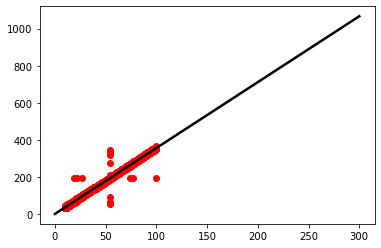

In [57]:
plt.scatter(xtv,ytv,color='red')
b,a=np.polyfit(xtv.values.reshape(4572),ytv.values.reshape(4572),deg=1)
xseq=np.linspace(0,300, num=100)
plt.plot(xseq,a + b * xseq,color='k',lw=2.5);

In [58]:
R.fit(xtv_train, ytv_train)
ytv_pred_ridge = R.predict(xtv_test)

L.fit(xtv_train, ytv_train)
ytv_pred_lasso = L.predict(xtv_test)

E.fit(xtv_train,ytv_train)
ytv_pred_elastic = E.predict(xtv_test)

ETR.fit(xtv_train,ytv_train)
ytv_pred_etr = ETR.predict(xtv_test)

GBR.fit(xtv_train,ytv_train)
ytv_pred_gbr =GBR.predict(xtv_test)

In [59]:
(mean_squared_error(ytv_test, ytv_pred_ridge))**0.5

6.579491115463078

In [60]:
r2_score(ytv_test, ytv_pred_ridge)

0.9948961474131574

In [61]:
(mean_squared_error(ytv_test, ytv_pred_lasso))**0.5

6.58021730817447

In [62]:
r2_score(ytv_test,  ytv_pred_lasso)

0.9948950207044122

In [63]:
(mean_squared_error(ytv_test, ytv_pred_elastic))**0.5

6.58043740356562

In [64]:
r2_score(ytv_test, ytv_pred_elastic)

0.9948946791955674

In [65]:
(mean_squared_error(ytv_test, ytv_pred_etr))**0.5

6.572336558719322

In [66]:
r2_score(ytv_test, ytv_pred_etr)

0.9949072412648281

In [67]:
(mean_squared_error(ytv_test, ytv_pred_gbr))**0.5

6.572982616943383

In [68]:
r2_score(ytv_test, ytv_pred_gbr)

0.9949062399830623

### Long Way- İnvest in radio

In [69]:
xrd,yrd= df[['Radio']],df[['Sales']]

In [70]:
xrd_train, xrd_test,yrd_train, yrd_test = train_test_split(xrd,yrd,test_size=0.20,random_state=13)

In [71]:
regmodel = lr.fit(xrd_train,yrd_train)

In [72]:
ETR.fit(xrd_train,yrd_train)
yrd_pred_etr = ETR.predict(xrd_test)

In [73]:
yrd_pretest = regmodel.predict(xrd_test)
yrd_pretest

array([[166.35449939],
       [ 94.73901208],
       [199.96973001],
       [138.05446468],
       [339.73692749],
       [318.90179261],
       [ 63.06264745],
       [257.37256305],
       [127.65372589],
       [ 67.75182659],
       [105.91213635],
       [181.70890414],
       [ 95.30160602],
       [194.91104514],
       [ 95.07922442],
       [195.63376177],
       [279.54181566],
       [179.94834503],
       [ 95.44025621],
       [215.66138226],
       [110.93520151],
       [193.29179163],
       [100.2517676 ],
       [345.50686935],
       [151.11169029],
       [ 69.90670345],
       [ 46.34382564],
       [208.56504508],
       [238.10553972],
       [301.07185313],
       [169.72611807],
       [159.82806781],
       [298.75670709],
       [282.83622814],
       [ 57.04841978],
       [129.14049467],
       [209.01514383],
       [102.02694431],
       [212.46492482],
       [122.77051741],
       [ 81.96579862],
       [ 64.81910019],
       [213.62948296],
       [160

In [74]:
(mean_squared_error(yrd_test, yrd_pred_etr))**0.5

63.76205074756794

In [75]:
r2_score(yrd_test, yrd_pred_etr)

0.5206661870455281

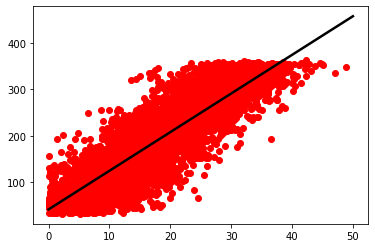

In [76]:
plt.scatter(xrd,yrd,color='red')
b,a=np.polyfit(xrd.values.reshape(4572),yrd.values.reshape(4572),deg=1)
xseq=np.linspace(0,50, num=100)
plt.plot(xseq,a + b * xseq,color='k',lw=2.5);

### Long Way- İnvest in Social Media

In [77]:
xsm,ysm= df[['Social Media']],df[['Sales']]

In [78]:
xsm_train, xsm_test,ysm_train, ysm_test = train_test_split(xsm,ysm,test_size=0.20,random_state=13)

In [79]:
regmodel = lr.fit(xsm_train,ysm_train)

In [80]:
ETR.fit(xsm_train,ysm_train)
ysm_pred_etr = ETR.predict(xsm_test)

In [81]:
ysm_pretest = regmodel.predict(xsm_test)
ysm_pretest

array([[201.30078142],
       [120.58227097],
       [162.18859184],
       [236.73193333],
       [168.89662742],
       [218.65212109],
       [135.00309598],
       [173.90939646],
       [136.40388532],
       [138.35726723],
       [138.51356168],
       [253.85946893],
       [141.46140754],
       [170.23672221],
       [121.2406757 ],
       [152.44106793],
       [144.64118885],
       [214.12724026],
       [162.88300418],
       [139.38347764],
       [168.67668939],
       [154.53946656],
       [166.97657797],
       [236.45368121],
       [254.38602131],
       [138.27616033],
       [132.92426978],
       [272.44822526],
       [204.51204209],
       [299.50555498],
       [131.8192085 ],
       [138.14458187],
       [304.45991278],
       [215.43516969],
       [138.0918253 ],
       [136.61947015],
       [207.62685631],
       [150.70193043],
       [181.37264131],
       [248.31124912],
       [181.65958793],
       [140.45389469],
       [215.66685518],
       [184

In [82]:
(mean_squared_error(ysm_test, ysm_pred_etr))**0.5

111.95657176283817

In [83]:
r2_score(ysm_test, ysm_pred_etr)

-0.47778990489496875

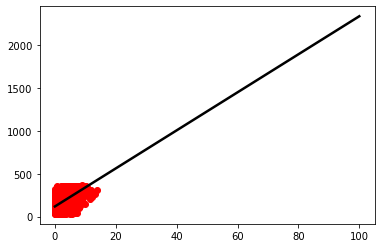

In [84]:
plt.scatter(xsm,ysm,color='red')
b,a=np.polyfit(xsm.values.reshape(4572),ysm.values.reshape(4572),deg=1)
xseq=np.linspace(0,100, num=100)
plt.plot(xseq,a + b * xseq,color='k',lw=2.5);

In [85]:
def regresions(dataset,y):
    LR=LinearRegression()
    Las=Lasso()
    R=Ridge()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KNR=KNeighborsRegressor()
    x=dataset.drop([y],axis=1)
    y=dataset[y]
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=13)

    regs=[LR,Las,R,ETR,KNR,GBR]
    regs_name=["Linear","Lasso","Ridge","ExtraTree",'KNeighbour','Gradient']

    r2=[]
    mean_s=[]
    mean_a=[]
    for reg in regs:
        model=reg.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        mean_s.append(mean_squared_error(y_test,y_pred)**0.5)
        r2.append(r2_score(y_test,y_pred))
        mean_a.append(mean_absolute_error(y_test,y_pred))
        
    df={"mean_absolute_error":mean_a,"mean_squared_error":mean_s,"r2_score":r2}
    a2={'RealData':y_test,'EstimatedData':y_pred}
    df2=pd.DataFrame(a2)
    df=pd.DataFrame(df,index=regs_name)
    return df,df2,model

In [86]:
a1,a2,model=regresions(df,'Sales')

In [87]:
a2.head()

,RealData,EstimatedData
4410,139.344661,136.160167
291,79.939987,81.895423
3888,279.224426,272.809742
3362,208.859421,210.507770
4285,346.352756,345.339244


In [88]:
a1.sort_values('r2_score')

,mean_absolute_error,mean_squared_error,r2_score
ExtraTree,3.894424,8.494165,0.991493
Linear,2.702117,6.547966,0.994945
Ridge,2.702126,6.547964,0.994945
Lasso,2.682127,6.546116,0.994948
KNeighbour,3.236850,6.244542,0.995403
Gradient,2.735754,5.458524,0.996487


<AxesSubplot:xlabel='RealData', ylabel='EstimatedData'>

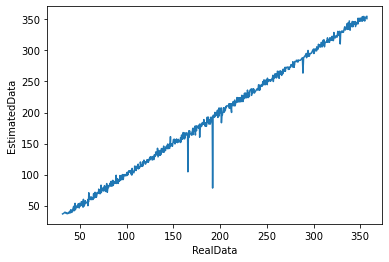

In [89]:
sns.lineplot(a2.RealData,a2.EstimatedData)